<a href="https://colab.research.google.com/github/EllouziMedAmin/DSWithPytorch/blob/main/Stock_price_Pred_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###preparing data

In [14]:
import yfinance as yf
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import requests

In [122]:
# Example: Get data for Apple
ticker = 'NVDA'
data = yf.download(ticker, start='2024-06-19', end='2025-04-15')
# Add technical indicators
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

[*********************100%***********************]  1 of 1 completed


In [123]:
data.isna().mean()

,,0
Price,Ticker,
Close,NVDA,0.000000
High,NVDA,0.000000
Low,NVDA,0.000000
Open,NVDA,0.000000
Volume,NVDA,0.000000
MA50,,0.239024
MA200,,0.970732


In [124]:
data.to_csv('NVDA_data.csv')
data=pd.read_csv('NVDA_data.csv')
# Skip the first 2 metadata rows
data = pd.read_csv("NVDA_data.csv", skiprows=2)

# Rename 'Price' to 'Date'
data.rename(columns={'Price': 'Date'}, inplace=True)


In [125]:
data

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2024-06-20,130.747787,140.725325,129.488103,139.765570,517768400,NaN,NaN
1,2024-06-21,126.538811,130.597815,124.269373,127.088678,655484700,NaN,NaN
2,2024-06-24,118.080902,124.429336,118.010920,123.209635,476060900,NaN,NaN
3,2024-06-25,126.058929,126.468832,119.290601,121.170135,425787500,NaN,NaN
4,2024-06-26,126.368858,128.088428,122.569792,126.098921,362975900,NaN,NaN
...,...,...,...,...,...,...,...,...
200,2025-04-08,96.300003,105.849998,94.459999,103.809998,476243400,119.956284,126.686883
201,2025-04-09,114.330002,115.099998,97.529999,98.889999,612918300,119.663321,126.625839
202,2025-04-10,107.570000,110.860001,99.150002,109.370003,437812400,119.340948,126.573284
203,2025-04-11,110.930000,111.550003,107.480003,108.500000,313417300,119.066778,126.497639


In [126]:
data.columns=['Date','Close','High','Low','Open', 'Volume', 'MA50', 'MA200' ]

In [127]:
# Add technical indicators
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

In [128]:
data.Date.min(),data.Date.max()

('2024-06-20', '2025-04-14')

In [66]:
api_key = 'cf8817dade8c448bbac1fab72ca7c1c2'
query = 'NVDA'
url = f'https://newsapi.org/v2/everything?q={query}&from=2025-03-16&sortBy=publishedAt&apiKey={api_key}'

response = requests.get(url)
news_data = response.json()

In [67]:
for article in news_data['articles'][:5]:
    print(article['title'], "|", article['publishedAt'],'\n')


Claris Advisors LLC MO Increases Position in NVIDIA Co. (NASDAQ:NVDA) | 2025-04-15T07:48:54Z 

Keb Asset Management LLC Cuts Stock Position in NVIDIA Co. (NASDAQ:NVDA) | 2025-04-15T07:48:53Z 

Vista Investment Partners II LLC Invests $5.55 Million in NVIDIA Co. (NASDAQ:NVDA) | 2025-04-15T07:48:52Z 

NVIDIA Co. (NASDAQ:NVDA) Shares Sold by Parker Investment Management LLC | 2025-04-15T07:48:52Z 

NVIDIA Co. (NASDAQ:NVDA) Shares Sold by Net Worth Advisory Group | 2025-04-15T07:48:51Z 



In [19]:
finbert = pipeline("sentiment-analysis", model="ProsusAI/finbert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [20]:
# Example headline
headline = "Apple stock falls as demand drops in China"
print(finbert(headline))

[{'label': 'negative', 'score': 0.9687139987945557}]


In [68]:
finbert("Claris Advisors LLC MO Increases Position in NVIDIA Co. (NASDAQ:NVDA)")

[{'label': 'neutral', 'score': 0.5384691953659058}]

In [69]:
url = 'http://openinsider.com/screener?s=NVDA&o=&pl=&ph=&ll=&lh=&fd=0&fdr=&td=0&tdr=&xp=1&vl=&vh=&ocl=&och=&sicMin=&sicMax=&sortcol=0&cnt=200&page=1'
df_list = pd.read_html(url)

In [70]:
insider_data = df_list[11]  # Usually the 12th table has the trade data
print(insider_data.head())

     X          Filing Date  Trade Date Ticker    Insider Name  \
0  NaN  2020-12-07 17:50:24  2020-12-03   NVDA   Kress Colette   
1  NaN  2020-09-29 17:21:16  2020-09-25   NVDA  Neal Stephen C   
2    M  2020-09-23 17:17:42  2020-09-21   NVDA  Neal Stephen C   
3    M  2020-07-13 19:25:27  2019-04-17   NVDA  Neal Stephen C   
4    M  2018-05-17 20:29:43  2013-03-22   NVDA     Puri Ajay K   

                      Title    Trade Type    Price   Qty   Owned  ΔOwn  \
0                  EVP, CFO  P - Purchase  $536.95   200  133962    0%   
1                       Dir  P - Purchase  $500.95   498    4566  +12%   
2                       Dir  P - Purchase  $498.09   450    4068  +12%   
3                       Dir  P - Purchase  $289.67    59    3618   +2%   
4  EVP, Worldwide Field Ops  P - Purchase   $18.95  1413  445248    0%   

       Value  1d  1w  1m  6m  
0  +$107,389 NaN NaN NaN NaN  
1  +$249,473 NaN NaN NaN NaN  
2  +$224,142 NaN NaN NaN NaN  
3   +$17,090 NaN NaN NaN NaN  
4  

In [71]:
ticker = yf.Ticker("NVDA")
fundamentals = ticker.info

In [72]:
# Grab selected fields
print({
    "P/E Ratio": fundamentals.get("trailingPE"),
    "EPS": fundamentals.get("trailingEps"),
    "ROE": fundamentals.get("returnOnEquity"),
    "Revenue (TTM)": fundamentals.get("totalRevenue"),
    "Debt to Equity": fundamentals.get("debtToEquity"),
})

{'P/E Ratio': 38.163265, 'EPS': 2.94, 'ROE': 1.1917701, 'Revenue (TTM)': 130497003520, 'Debt to Equity': 12.946}


In [73]:
print(ticker.quarterly_financials)     # Income Statement

                                                       2025-01-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                       0.123964   
Normalized EBITDA                                   25821000000.0   
Total Unusual Items                                           NaN   
Total Unusual Items Excluding Goodwill                        NaN   
Net Income From Continuing Operation Net Minori...  22091000000.0   
Reconciled Depreciation                               543000000.0   
Reconciled Cost Of Revenue                          10608000000.0   
EBITDA                                              25821000000.0   
EBIT                                                25278000000.0   
Net Interest Income                                   450000000.0   
Interest Expense                                       61000000.0   
Interest Income                                       511000000.0   
Normalized Income                 

In [74]:
print(ticker.quarterly_balance_sheet)  # Balance Sheet

                                                     2025-01-31  \
Treasury Shares Number                                      NaN   
Ordinary Shares Number                            24477000000.0   
Share Issued                                      24477000000.0   
Net Debt                                                    NaN   
Total Debt                                        10270000000.0   
...                                                         ...   
Receivables                                       23065000000.0   
Accounts Receivable                               23065000000.0   
Cash Cash Equivalents And Short Term Investments  43210000000.0   
Other Short Term Investments                      34621000000.0   
Cash And Cash Equivalents                          8589000000.0   

                                                     2024-10-31  \
Treasury Shares Number                                      NaN   
Ordinary Shares Number                            24508000000

In [75]:
vix = yf.download('^VIX', start='2025-03-16', end='2025-04-15')
vix.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,
2025-04-08,52.330002,57.520000,36.480000,44.040001,0
2025-04-09,33.619999,57.959999,31.900000,50.980000,0
2025-04-10,40.720001,54.869999,34.439999,34.439999,0
2025-04-11,37.560001,46.119999,36.849998,40.799999,0
2025-04-14,30.889999,35.169998,29.750000,34.759998,0


In [76]:
!unzip /content/analyst_ratings_processed.csv.zip

Archive:  /content/analyst_ratings_processed.csv.zip
  inflating: analyst_ratings_processed.csv  


In [161]:
nvd=pd.read_csv('/content/analyst_ratings_processed.csv')

In [162]:
nvd_df=nvd[nvd['stock']=='NVDA']

In [163]:
nvd_df.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-163-7bf6bbda33d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df.drop(columns=['Unnamed: 0'], inplace=True)


In [164]:
nvd_df.reset_index(drop=True, inplace=True)

In [165]:
nvd_df.head()

,title,date,stock
0,Shares of several technology companies are tra...,2020-06-10 12:37:00-04:00,NVDA
1,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,NVDA
2,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,NVDA
3,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,NVDA
4,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,NVDA


In [166]:
nvd_df['date'].min(),nvd_df['date'].max()

('2011-03-03 10:06:00-05:00', '2020-06-10 12:37:00-04:00')

In [90]:
finbert(nvd_df.loc[0]['title'])

[{'label': 'positive', 'score': 0.9556882381439209}]

In [91]:
df=pd.read_csv('/content/NVDA.csv')

In [92]:
df.shape

(6393, 7)

In [93]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [96]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [107]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

In [108]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6388,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,95.72356,66.937825
6389,2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,96.53648,67.351700
6390,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,97.45598,67.767180
6391,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,98.31542,68.175760


In [111]:
df.isna().mean()

,0
Date,0.000000
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,0.000000
MA50,0.007665
MA200,0.031128


In [113]:
df.dropna(inplace=True)

In [115]:
df.shape

(6194, 9)

In [119]:
df.Date.min(),df.Date.max()

('1999-11-04', '2024-06-18')

In [129]:
df.reset_index(drop=True, inplace=True)

In [130]:
df.shape

(6194, 9)

In [132]:
merged_df = pd.concat([data, df], ignore_index=True)
merged_df.Date.min(),merged_df.Date.max()

('1999-11-04', '2025-04-14')

In [135]:
merged_df.isna().mean()

,0
Date,0.000000
Close,0.000000
High,0.000000
Low,0.000000
Open,0.000000
Volume,0.000000
MA50,0.007657
MA200,0.031099
Adj Close,0.032036


In [134]:
merged_df['MA50'] = merged_df['Close'].rolling(window=50).mean()
merged_df['MA200'] = merged_df['Close'].rolling(window=200).mean()

In [136]:
merged_df

,Date,Close,High,Low,Open,Volume,MA50,MA200,Adj Close
0,2024-06-20,130.747787,140.725325,129.488103,139.765570,517768400,NaN,NaN,NaN
1,2024-06-21,126.538811,130.597815,124.269373,127.088678,655484700,NaN,NaN,NaN
2,2024-06-24,118.080902,124.429336,118.010920,123.209635,476060900,NaN,NaN,NaN
3,2024-06-25,126.058929,126.468832,119.290601,121.170135,425787500,NaN,NaN,NaN
4,2024-06-26,126.368858,128.088428,122.569792,126.098921,362975900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6394,2024-06-12,125.199997,126.879997,122.570000,123.059998,299595000,95.72356,66.937825,125.199997
6395,2024-06-13,129.610001,129.800003,127.160004,129.389999,260704500,96.53648,67.351700,129.610001
6396,2024-06-14,131.880005,132.839996,128.320007,129.960007,309320400,97.45598,67.767180,131.880005
6397,2024-06-17,130.979996,133.729996,129.580002,132.990005,288504400,98.31542,68.175760,130.979996


In [137]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


input_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
target_cols = ['MA50', 'MA200', 'Adj Close']

# A copy to avoid modifying original
df_filled = df.copy()

# For each target column
for target in target_cols:
    # Split into rows with and without NA in target
    train_data = df_filled[df_filled[target].notna()]
    predict_data = df_filled[df_filled[target].isna()]

    # Only predict if there's actually missing data
    if not predict_data.empty:
        X_train = train_data[input_cols]
        y_train = train_data[target]
        X_pred = predict_data[input_cols]

        # Train model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict and fill missing values
        df_filled.loc[df_filled[target].isna(), target] = model.predict(X_pred)


In [139]:
df_filled.to_csv('NVDA_Data_(num).csv',index=False)

In [184]:
df_filled

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
0,1999-11-04,0.057813,0.062370,0.057813,0.060807,0.055774,1260336000,0.048035,0.042756
1,1999-11-05,0.062500,0.063021,0.055990,0.058854,0.053982,616368000,0.048186,0.042845
2,1999-11-08,0.057031,0.062240,0.055208,0.060547,0.055535,470016000,0.048314,0.042922
3,1999-11-09,0.060417,0.060677,0.057292,0.059635,0.054699,272352000,0.048427,0.043011
4,1999-11-10,0.059831,0.059896,0.057943,0.059115,0.054222,144048000,0.048437,0.043098
...,...,...,...,...,...,...,...,...,...
6189,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,95.723560,66.937825
6190,2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,96.536480,67.351700
6191,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,97.455980,67.767180
6192,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,98.315420,68.175760


In [142]:
nvd_df['date'].min(),nvd_df['date'].max()

('2011-03-03 10:06:00-05:00', '2020-06-10 12:37:00-04:00')

In [143]:
nvd_df['title']

,title
0,Shares of several technology companies are tra...
1,Afternoon Market Stats in 5 Minutes
2,Morning Market Stats in 5 Minutes
3,Shares of several technology companies are tra...
4,Afternoon Market Stats in 5 Minutes
...,...
3128,J.P. Morgan Upgrades NVIDIA Corporation To Neu...
3129,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT"
3130,Goldman Sachs Gives Color On Semiconductors (N...
3131,Auriga Still Not Sure Where Reality Lies For N...


In [148]:
for _ in range(nvd_df.shape[0]):
  print(finbert(nvd_df.loc[_]['title'])[0]['label'])
  print(finbert(nvd_df.loc[_]['title'])[0]['score'])
  print('\n')
  if _ ==6 :
    break


positive
0.9556882381439209


neutral
0.9095448851585388


neutral
0.9097254276275635


positive
0.9570684432983398


neutral
0.9095448851585388


negative
0.910738468170166


neutral
0.9097254276275635




In [149]:
for _ in range(nvd_df.shape[0]):
  nvd_df.loc[_,'Slabel']=finbert(nvd_df.loc[_]['title'])[0]['label']
  nvd_df.loc[_,'score']=finbert(nvd_df.loc[_]['title'])[0]['score']

<ipython-input-149-3990eaac0ffa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df.loc[_,'Slabel']=finbert(nvd_df.loc[_]['title'])[0]['label']
<ipython-input-149-3990eaac0ffa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df.loc[_,'score']=finbert(nvd_df.loc[_]['title'])[0]['score']


In [167]:
def get_sentiment(row):
    result = finbert(row['title'])[0]
    return pd.Series([result['label'], result['score']])

nvd_df[['Slabel', 'score']] = nvd_df.apply(get_sentiment, axis=1)


<ipython-input-167-3436c1a4afd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df[['Slabel', 'score']] = nvd_df.apply(get_sentiment, axis=1)
<ipython-input-167-3436c1a4afd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df[['Slabel', 'score']] = nvd_df.apply(get_sentiment, axis=1)


In [169]:
nvd_df.date

,date
0,2020-06-10 12:37:00-04:00
1,2020-06-10 12:12:00-04:00
2,2020-06-10 10:22:00-04:00
3,2020-06-09 13:40:00-04:00
4,2020-06-08 12:30:00-04:00
...,...
3128,2011-03-08 07:59:00-05:00
3129,2011-03-08 07:24:00-05:00
3130,2011-03-07 08:23:00-05:00
3131,2011-03-07 07:47:00-05:00


In [171]:
pd.to_datetime(nvd_df['date'], errors='coerce', utc=True).isna().sum()

np.int64(0)

In [172]:
nvd_df.loc[:, 'date'] = pd.to_datetime(nvd_df['date'], errors='coerce', utc=True)

In [177]:
print(nvd_df['date'].dtype)

object


In [178]:
nvd_df['date_converted'] = pd.to_datetime(nvd_df['date'], errors='coerce', utc=True)

# Step 2: Confirm it's actually datetime
print(nvd_df['date_converted'].dtype)

datetime64[ns, UTC]


<ipython-input-178-50845009392a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df['date_converted'] = pd.to_datetime(nvd_df['date'], errors='coerce', utc=True)


In [179]:
nvd_df['date_converted'] = nvd_df['date_converted'].dt.date

<ipython-input-179-6f3f90bd27e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df['date_converted'] = nvd_df['date_converted'].dt.date


In [180]:
nvd_df

,title,date,stock,Slabel,score,date_converted
0,Shares of several technology companies are tra...,2020-06-10 16:37:00+00:00,NVDA,positive,0.955688,2020-06-10
1,Afternoon Market Stats in 5 Minutes,2020-06-10 16:12:00+00:00,NVDA,neutral,0.909545,2020-06-10
2,Morning Market Stats in 5 Minutes,2020-06-10 14:22:00+00:00,NVDA,neutral,0.909725,2020-06-10
3,Shares of several technology companies are tra...,2020-06-09 17:40:00+00:00,NVDA,positive,0.957068,2020-06-09
4,Afternoon Market Stats in 5 Minutes,2020-06-08 16:30:00+00:00,NVDA,neutral,0.909545,2020-06-08
...,...,...,...,...,...,...
3128,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,2011-03-08 12:59:00+00:00,NVDA,positive,0.642551,2011-03-08
3129,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",2011-03-08 12:24:00+00:00,NVDA,positive,0.554446,2011-03-08
3130,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07 13:23:00+00:00,NVDA,neutral,0.944452,2011-03-07
3131,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07 12:47:00+00:00,NVDA,neutral,0.874426,2011-03-07


In [258]:
nvd_df.to_csv('NVDA_Sentiment.csv',index=False)

In [181]:
nvd_df.isna().sum()

,0
title,0
date,0
stock,0
Slabel,0
score,0
date_converted,0


In [185]:
df_filled.rename(columns={'Date': 'date_converted'}, inplace=True)

merged_df = nvd_df.merge(df_filled, on='date_converted', how='left')


In [196]:
common_dates = set(nvd_df['date_converted']) & set(df_filled['date_converted'])
print(f"Number of common dates: {len(common_dates)}")
print(sorted(common_dates)[:10])  # show first 10


Number of common dates: 1124
[datetime.date(2011, 3, 3), datetime.date(2011, 3, 7), datetime.date(2011, 3, 8), datetime.date(2011, 3, 9), datetime.date(2011, 3, 10), datetime.date(2011, 3, 15), datetime.date(2011, 3, 16), datetime.date(2011, 3, 23), datetime.date(2011, 3, 24), datetime.date(2011, 3, 25)]


In [194]:
df_filled[df_filled['date_converted']=='2011-03-08']

,date_converted,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
2851,2011-03-08,0.51725,0.52,0.478,0.48875,0.448295,1947184000,0.54341,0.352554


In [195]:
df_filled['date_converted'] = pd.to_datetime(df_filled['date_converted']).dt.date

In [197]:
merged_df_tweet_num = nvd_df.merge(df_filled, left_on='date_converted', right_on='date_converted', how='left')

In [200]:
merged_df_tweet_num.isna().mean()

,0
title,0.000000
date,0.000000
stock,0.000000
Slabel,0.000000
score,0.000000
date_converted,0.000000
Open,0.023939
High,0.023939
Low,0.023939
Close,0.023939


In [201]:
merged_df_final=merged_df_tweet_num.dropna()

In [203]:
merged_df_final.drop(columns=['title'	,'date',	'stock'],axis=1,inplace=True)

<ipython-input-203-39bd098d2979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_final.drop(columns=['title'	,'date',	'stock'],axis=1,inplace=True)


In [204]:
merged_df_final.shape

(3058, 11)

In [205]:
merged_df_final.tail()

,Slabel,score,date_converted,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
3128,positive,0.642551,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1.947184e+09,0.543410,0.352554
3129,positive,0.554446,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1.947184e+09,0.543410,0.352554
3130,neutral,0.944452,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1.019140e+09,0.541095,0.351701
3131,neutral,0.874426,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1.019140e+09,0.541095,0.351701
3132,negative,0.825096,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1.593704e+09,0.535430,0.349700


In [211]:
merged_df_final.duplicated().sum()

np.int64(9)

In [212]:
merged_df_finalwd=merged_df_final.drop_duplicates()

In [213]:
merged_df_finalwd.tail()

,Slabel,score,date_converted,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
3128,positive,0.642551,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1.947184e+09,0.543410,0.352554
3129,positive,0.554446,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1.947184e+09,0.543410,0.352554
3130,neutral,0.944452,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1.019140e+09,0.541095,0.351701
3131,neutral,0.874426,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1.019140e+09,0.541095,0.351701
3132,negative,0.825096,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1.593704e+09,0.535430,0.349700


In [217]:
merged_df_finalwd['date_converted'].duplicated().sum()

np.int64(1925)

In [220]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
nvd_df['sentiment_label'] = nvd_df['Slabel'].map(sentiment_map)
nvd_df['weighted_sentiment'] = nvd_df['sentiment_label'] * nvd_df['score']

<ipython-input-220-32118e8c965a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df['sentiment_label'] = nvd_df['Slabel'].map(sentiment_map)
<ipython-input-220-32118e8c965a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvd_df['weighted_sentiment'] = nvd_df['sentiment_label'] * nvd_df['score']


In [221]:

agg_sentiment = nvd_df.groupby('date_converted').agg({
    'sentiment_label': ['mean', 'sum'],
    'weighted_sentiment': 'mean',
    'score': 'mean',
    'Slabel': 'count'
})
agg_sentiment.columns = ['label_mean', 'label_sum', 'weighted_mean', 'score_mean', 'tweet_count']
agg_sentiment.reset_index(inplace=True)


In [222]:
agg_sentiment

,date_converted,label_mean,label_sum,weighted_mean,score_mean,tweet_count
0,2011-03-03,-1.000000,-1,-0.825096,0.825096,1
1,2011-03-07,0.000000,0,0.000000,0.909439,2
2,2011-03-08,0.250000,1,0.086861,0.736391,4
3,2011-03-09,0.000000,0,0.000000,0.922541,3
4,2011-03-10,0.000000,0,0.000000,0.888172,2
...,...,...,...,...,...,...
1190,2020-05-31,1.000000,1,0.857773,0.857773,1
1191,2020-06-02,-0.500000,-1,-0.300774,0.763496,2
1192,2020-06-08,-0.333333,-1,-0.303579,0.910003,3
1193,2020-06-09,1.000000,1,0.957068,0.957068,1


In [223]:
merged_df_f2 = df_filled.merge(agg_sentiment, left_on='date_converted', right_on='date_converted', how='left')
merged_df_f2.drop(columns=['date_converted'], inplace=True)


In [224]:
merged_df_f2.shape

(6194, 13)

In [227]:
merged_df_f2.isna().mean()

,0
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,0.000000
MA50,0.000000
MA200,0.000000
label_mean,0.818534
label_sum,0.818534


In [228]:
final_df = df_filled.merge(agg_sentiment, left_on='date_converted', right_on='date_converted', how='left')


In [243]:
# Rename one column to avoid collision
df_filled.rename(columns={'date_converted': 'date_converted_filled'}, inplace=True)

# Now merge
final_df_2 = df_filled.merge(agg_sentiment, left_on='date_converted_filled', right_on='date_converted', how='left')

# Drop one of the `date_converted` columns if needed
final_df_2.drop(columns=['date_converted'], inplace=True)


In [244]:
final_df_2.shape

(6194, 14)

In [245]:
final_df_2

,date_converted_filled,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count
0,1999-11-04,0.057813,0.062370,0.057813,0.060807,0.055774,1260336000,0.048035,0.042756,NaN,NaN,NaN,NaN,NaN
1,1999-11-05,0.062500,0.063021,0.055990,0.058854,0.053982,616368000,0.048186,0.042845,NaN,NaN,NaN,NaN,NaN
2,1999-11-08,0.057031,0.062240,0.055208,0.060547,0.055535,470016000,0.048314,0.042922,NaN,NaN,NaN,NaN,NaN
3,1999-11-09,0.060417,0.060677,0.057292,0.059635,0.054699,272352000,0.048427,0.043011,NaN,NaN,NaN,NaN,NaN
4,1999-11-10,0.059831,0.059896,0.057943,0.059115,0.054222,144048000,0.048437,0.043098,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,95.723560,66.937825,NaN,NaN,NaN,NaN,NaN
6190,2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,96.536480,67.351700,NaN,NaN,NaN,NaN,NaN
6191,2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,97.455980,67.767180,NaN,NaN,NaN,NaN,NaN
6192,2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,98.315420,68.175760,NaN,NaN,NaN,NaN,NaN


In [231]:
final_df.isna().mean()

,0
date_converted,0.000000
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Adj Close,0.000000
Volume,0.000000
MA50,0.000000
MA200,0.000000
label_mean,0.818534


In [246]:
#final_df_2.drop(columns=['date_converted'], inplace=True)

final_df_2.fillna({
    'label_mean': 0,
    'label_sum': 0,
    'weighted_mean': 0,
    'score_mean': 0,
    'tweet_count': 0
}, inplace=True)

final_df_2['has_sentiment'] = (final_df_2['tweet_count'] > 0).astype(int)


In [257]:
final_df_2.rename(columns={'date_converted_filled': 'Date'}, inplace=True)
final_df_2.to_csv('NVDA_STOCK_SENTIMENT_Draft.csv',index=False)

In [247]:
perfect_df2=final_df_2[final_df_2['has_sentiment']==1]

In [248]:
perfect_df2

,date_converted_filled,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count,has_sentiment
2848,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.535430,0.349700,-1.000000,-1.0,-0.825096,0.825096,1.0,1
2850,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.541095,0.351701,0.000000,0.0,0.000000,0.909439,2.0,1
2851,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.543410,0.352554,0.250000,1.0,0.086861,0.736391,4.0,1
2852,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.545480,0.353401,0.000000,0.0,0.000000,0.922541,3.0,1
2853,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.546970,0.354055,0.000000,0.0,0.000000,0.888172,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,1.0,0.547186,0.547186,1.0,1
5175,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,-1.0,-0.300774,0.763496,2.0,1
5179,2020-06-08,8.87725,8.88975,8.68575,8.80500,8.778849,387736000,7.630800,6.018033,-0.333333,-1.0,-0.303579,0.910003,3.0,1
5180,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,1.0,0.957068,0.957068,1.0,1


In [249]:
perfect_df2.rename(columns={'date_converted_filled': 'Date'}, inplace=True)


<ipython-input-249-428e4cd2f43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_df2.rename(columns={'date_converted_filled': 'Date'}, inplace=True)


In [235]:
perfect_df=final_df[final_df['has_sentiment']==1]

In [250]:
perfect_df2

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count,has_sentiment
2848,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.535430,0.349700,-1.000000,-1.0,-0.825096,0.825096,1.0,1
2850,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.541095,0.351701,0.000000,0.0,0.000000,0.909439,2.0,1
2851,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.543410,0.352554,0.250000,1.0,0.086861,0.736391,4.0,1
2852,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.545480,0.353401,0.000000,0.0,0.000000,0.922541,3.0,1
2853,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.546970,0.354055,0.000000,0.0,0.000000,0.888172,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,1.0,0.547186,0.547186,1.0,1
5175,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,-1.0,-0.300774,0.763496,2.0,1
5179,2020-06-08,8.87725,8.88975,8.68575,8.80500,8.778849,387736000,7.630800,6.018033,-0.333333,-1.0,-0.303579,0.910003,3.0,1
5180,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,1.0,0.957068,0.957068,1.0,1


In [251]:
perfect_df2.drop('has_sentiment',axis=1,inplace=True)

<ipython-input-251-1588a4df6cea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_df2.drop('has_sentiment',axis=1,inplace=True)


In [253]:
perfect_df2

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count
2848,2011-03-03,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.535430,0.349700,-1.000000,-1.0,-0.825096,0.825096,1.0
2850,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.541095,0.351701,0.000000,0.0,0.000000,0.909439,2.0
2851,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.543410,0.352554,0.250000,1.0,0.086861,0.736391,4.0
2852,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.545480,0.353401,0.000000,0.0,0.000000,0.922541,3.0
2853,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.546970,0.354055,0.000000,0.0,0.000000,0.888172,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,1.0,0.547186,0.547186,1.0
5175,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,-1.0,-0.300774,0.763496,2.0
5179,2020-06-08,8.87725,8.88975,8.68575,8.80500,8.778849,387736000,7.630800,6.018033,-0.333333,-1.0,-0.303579,0.910003,3.0
5180,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,1.0,0.957068,0.957068,1.0


In [252]:
perfect_df2.to_csv('NVDA_STOCK_SENTIMENT_FINAL.csv',index=False)

###visualization

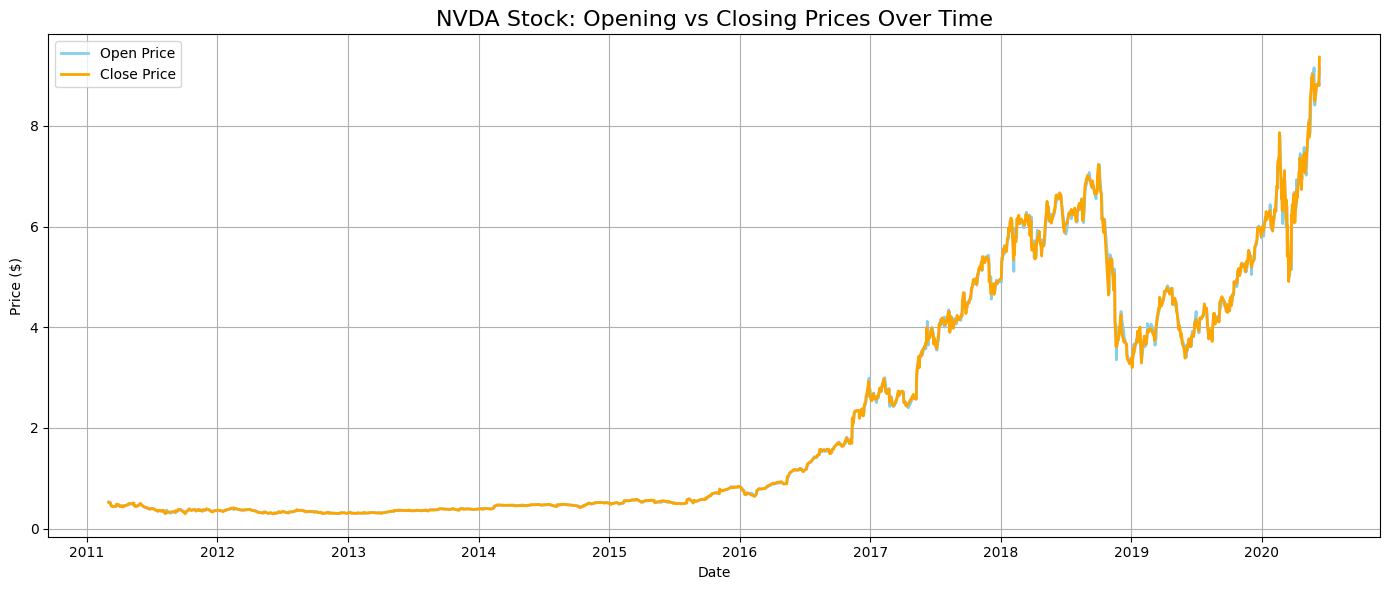

In [254]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(perfect_df2['Date'], perfect_df2['Open'], label='Open Price', color='skyblue', linewidth=2)
plt.plot(perfect_df2['Date'], perfect_df2['Close'], label='Close Price', color='orange', linewidth=2)

plt.title('NVDA Stock: Opening vs Closing Prices Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

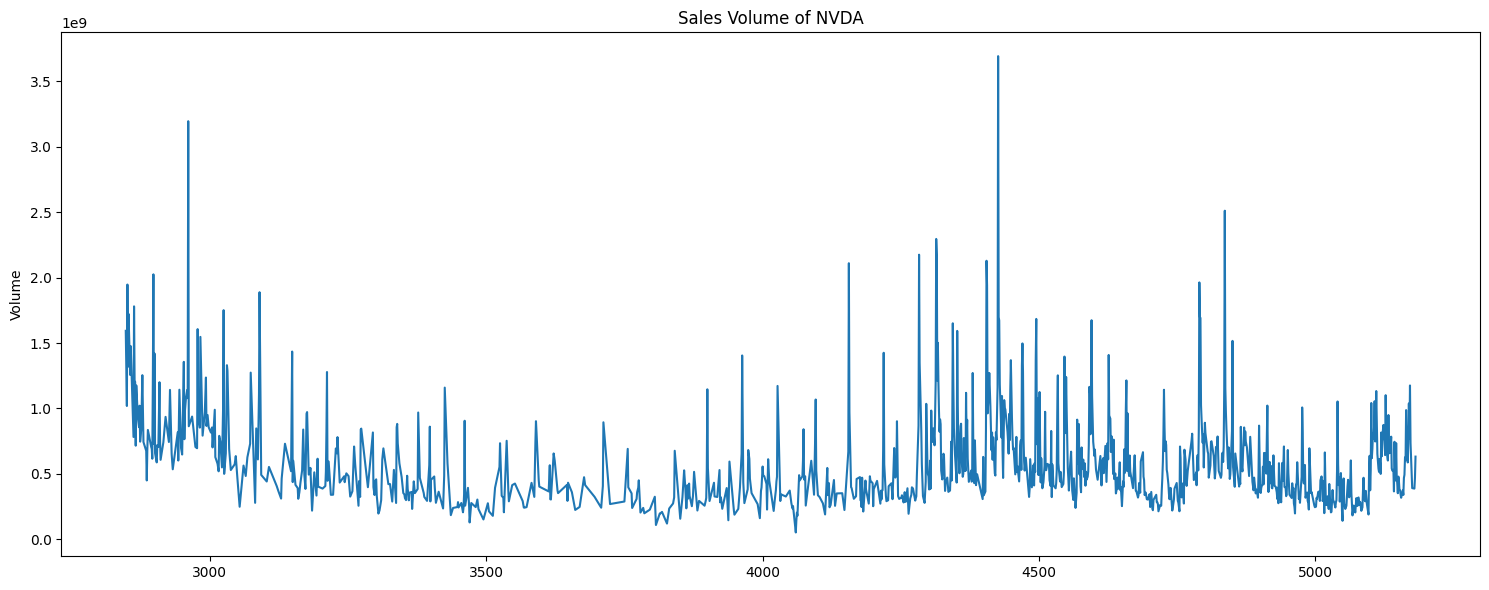

In [262]:
plt.figure(figsize=(15, 6))
perfect_df2['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of NVDA")
plt.tight_layout()
plt.show()

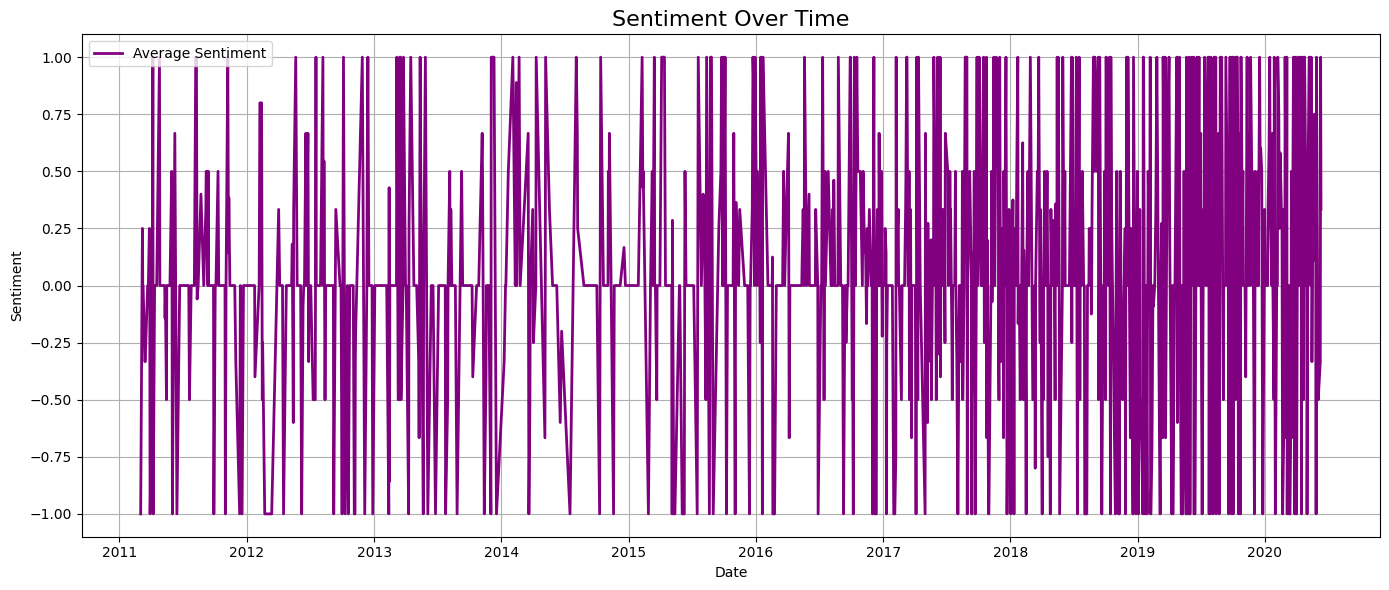

In [260]:
plt.figure(figsize=(14, 6))

# Plot Sentiment Mean Over Time
plt.plot(perfect_df2['Date'], perfect_df2['label_mean'], label='Average Sentiment', color='purple', linewidth=2)

plt.title('Sentiment Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


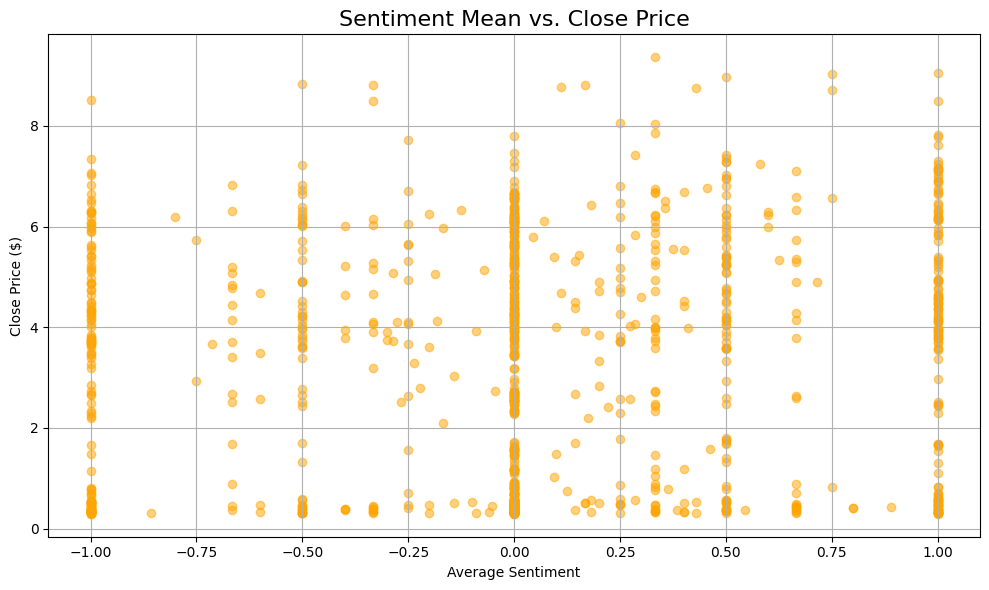

In [261]:
plt.figure(figsize=(10, 6))

# Scatter plot: Sentiment Mean vs Close Price
plt.scatter(perfect_df2['label_mean'], perfect_df2['Close'], alpha=0.5, color='orange')
plt.title('Sentiment Mean vs. Close Price', fontsize=16)
plt.xlabel('Average Sentiment')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

# Plot sentiment score distribution
perfect_df2['sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'], alpha=0.7)
plt.title('Sentiment Distribution (Positive/Negative/Neutral)', fontsize=16)
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [263]:
perfect_df2[perfect_df2['Open']<perfect_df2['Close']]

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count
2856,2011-03-15,0.43275,0.44900,0.42525,0.44150,0.404956,1256280000,0.551260,0.355870,-0.333333,-1.0,-0.278049,0.904734,3.0
2857,2011-03-16,0.43750,0.45875,0.43250,0.43825,0.401975,1476520000,0.552115,0.356489,-0.333333,-1.0,-0.313984,0.931101,3.0
2862,2011-03-23,0.43550,0.44650,0.42600,0.44525,0.408395,782396000,0.550075,0.360026,0.000000,0.0,0.000000,0.900870,1.0
2863,2011-03-24,0.45475,0.48625,0.45375,0.48075,0.440957,1780592000,0.549535,0.361066,0.000000,0.0,0.000000,0.947051,1.0
2865,2011-03-28,0.47675,0.49100,0.47250,0.48300,0.443020,1204284000,0.545140,0.362940,0.250000,1.0,0.235554,0.808498,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,2020-05-22,8.82525,9.09300,8.71325,9.02625,8.995334,1038764000,7.001230,5.779070,0.750000,15.0,0.590280,0.795776,20.0
5172,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,1.0,0.547186,0.547186,1.0
5175,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,-1.0,-0.300774,0.763496,2.0
5180,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,1.0,0.957068,0.957068,1.0


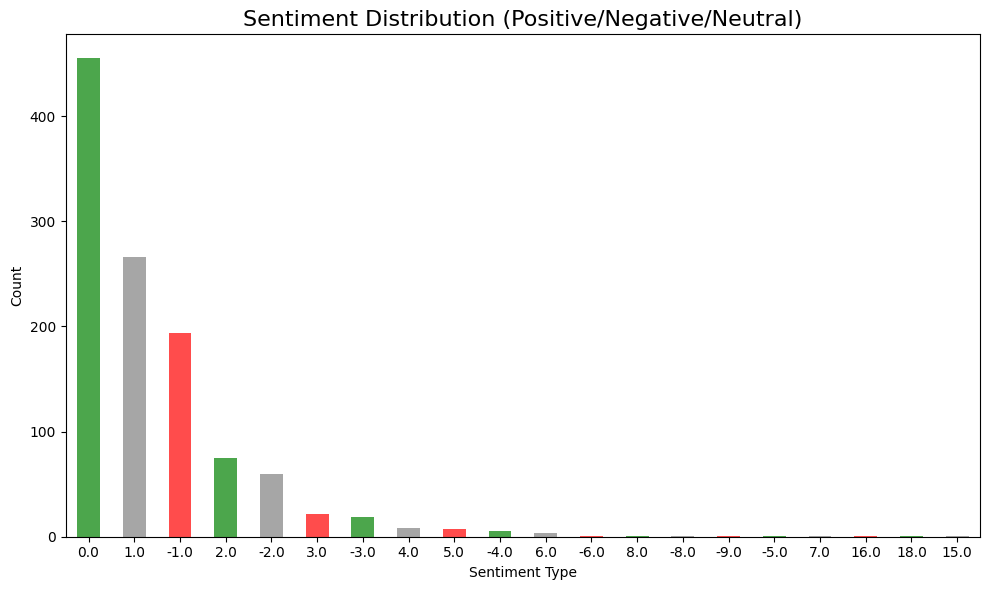

In [267]:
plt.figure(figsize=(10, 6))

# Plot sentiment score distribution
perfect_df2['label_sum'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'], alpha=0.7)
plt.title('Sentiment Distribution (Positive/Negative/Neutral)', fontsize=16)
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-268-9c08f6c3122b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_df2['daily_return'] = perfect_df2['Close'].pct_change()


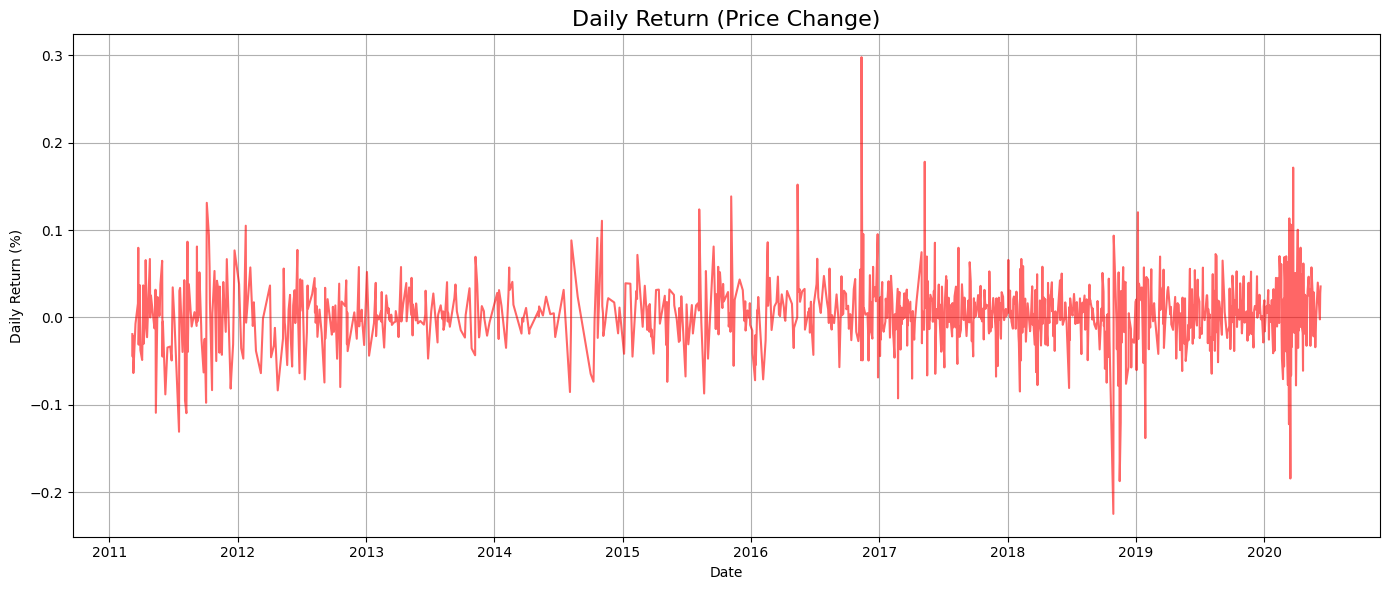

In [268]:
perfect_df2['daily_return'] = perfect_df2['Close'].pct_change()

plt.figure(figsize=(14, 6))
plt.plot(perfect_df2['Date'], perfect_df2['daily_return'], color='red', label='Daily Return', alpha=0.6)
plt.title('Daily Return (Price Change)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


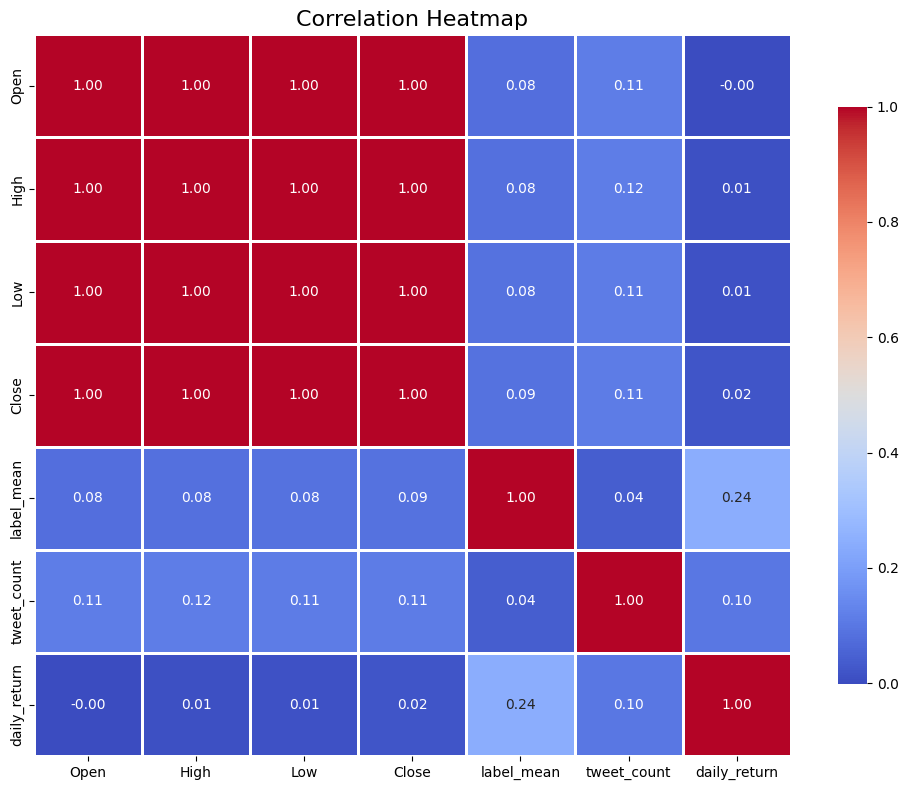

In [269]:
import seaborn as sns

# Select a subset of features to examine correlations
correlation_data = perfect_df2[['Open', 'High', 'Low', 'Close', 'label_mean', 'tweet_count', 'daily_return']]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-271-7bd6b849aa44>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_sum', y='Close', data=perfect_df2, palette="Set2")


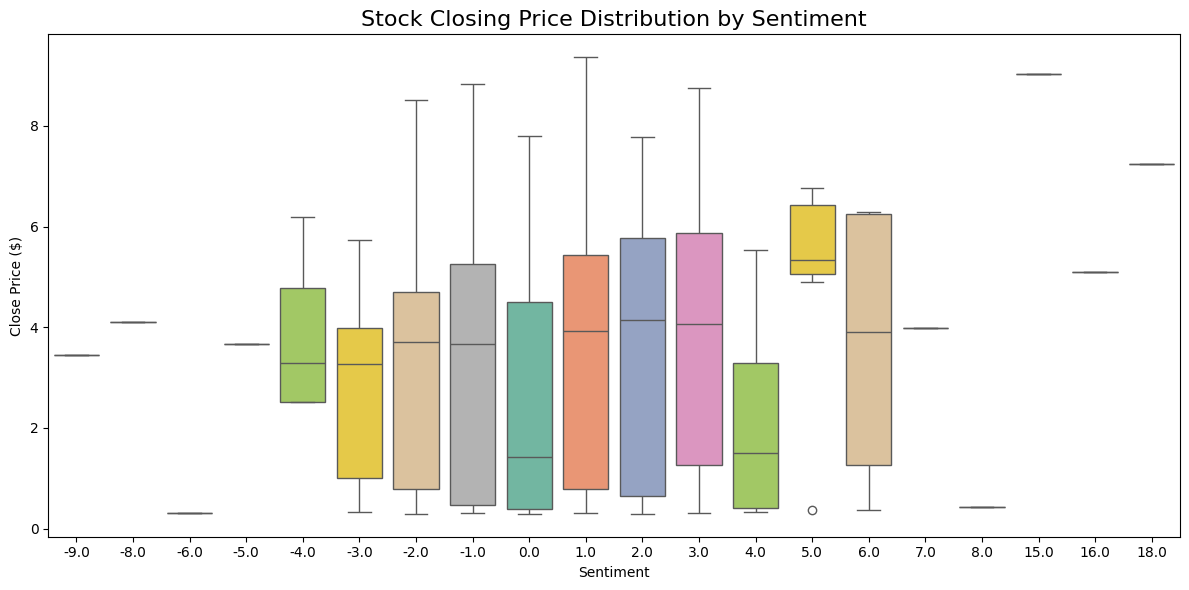

In [271]:
plt.figure(figsize=(12, 6))

# Boxplot for Close Price based on Sentiment
sns.boxplot(x='label_sum', y='Close', data=perfect_df2, palette="Set2")
plt.title('Stock Closing Price Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Close Price ($)')
plt.tight_layout()
plt.show()


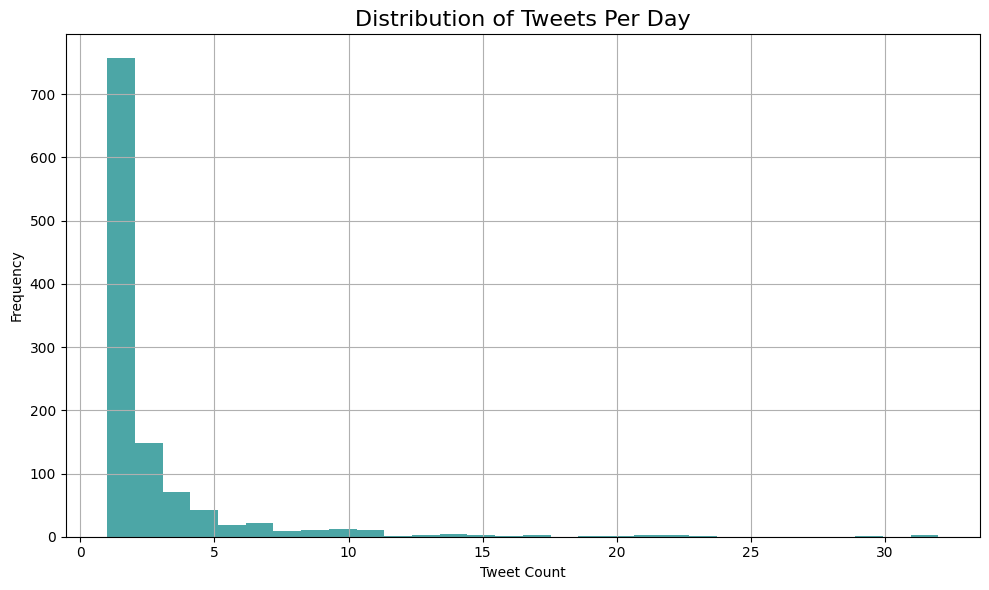

In [272]:
plt.figure(figsize=(10, 6))

# Plot histogram of tweet count
plt.hist(perfect_df2['tweet_count'], bins=30, color='teal', alpha=0.7)
plt.title('Distribution of Tweets Per Day', fontsize=16)
plt.xlabel('Tweet Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-274-279b9c461b40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_df2['rolling_mean'] = perfect_df2['Close'].rolling(window=50).mean()
<ipython-input-274-279b9c461b40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_df2['rolling_volatility'] = perfect_df2['Close'].rolling(window=50).std()


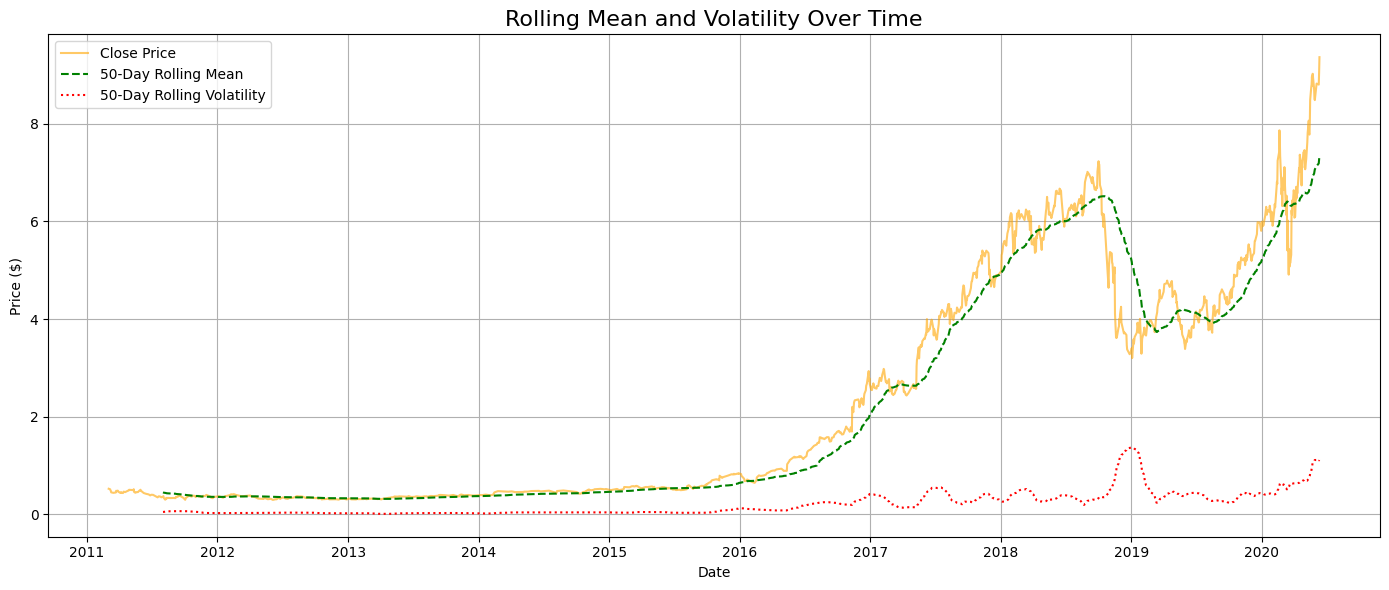

In [274]:
# Rolling mean and volatility (standard deviation)
perfect_df2['rolling_mean'] = perfect_df2['Close'].rolling(window=50).mean()
perfect_df2['rolling_volatility'] = perfect_df2['Close'].rolling(window=50).std()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(perfect_df2['Date'], perfect_df2['Close'], label='Close Price', color='orange', alpha=0.6)
plt.plot(perfect_df2['Date'], perfect_df2['rolling_mean'], label='50-Day Rolling Mean', color='green', linestyle='--')
plt.plot(perfect_df2['Date'], perfect_df2['rolling_volatility'], label='50-Day Rolling Volatility', color='red', linestyle=':')

plt.title('Rolling Mean and Volatility Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [275]:
import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=perfect_df2['Date'],
    open=perfect_df2['Open'],
    high=perfect_df2['High'],
    low=perfect_df2['Low'],
    close=perfect_df2['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Layout for better readability
fig.update_layout(
    title='Candlestick Chart: NVDA Stock',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False
)

fig.show()


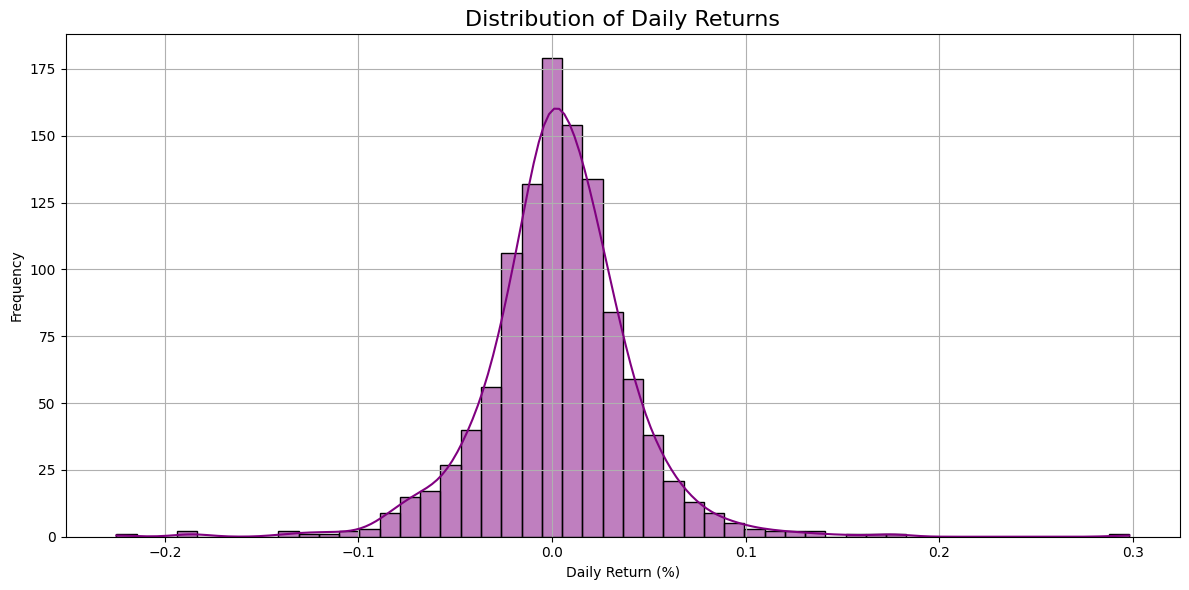

In [276]:
plt.figure(figsize=(12, 6))

# Plot the distribution of daily returns
sns.histplot(perfect_df2['daily_return'], bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


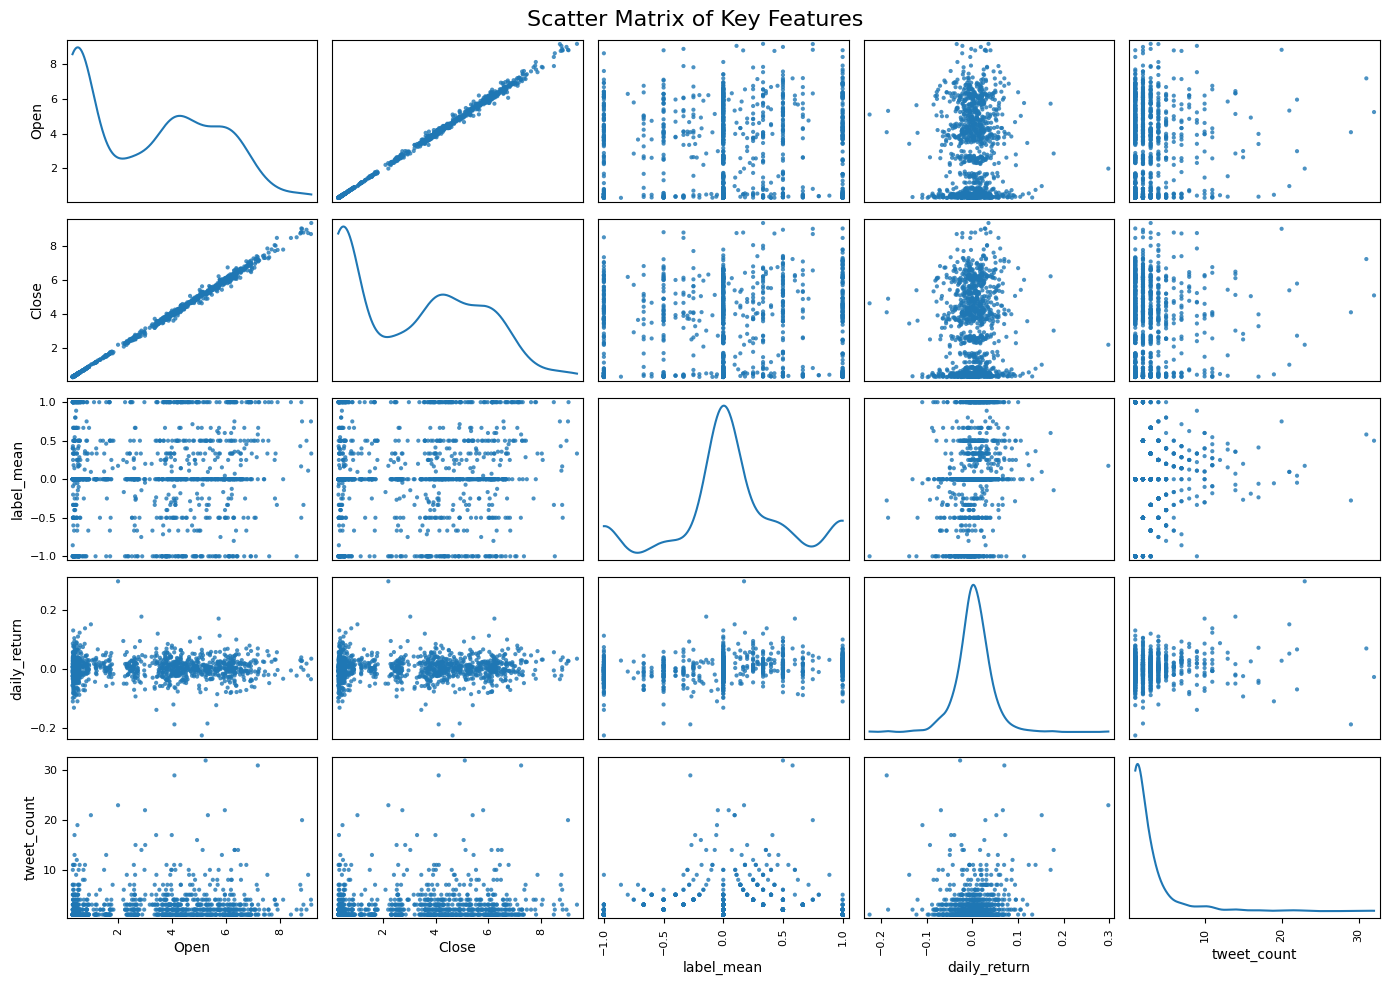

In [277]:
from pandas.plotting import scatter_matrix

# Select a subset of relevant columns for the scatter matrix
subset_df = perfect_df2[['Open', 'Close', 'label_mean', 'daily_return', 'tweet_count']]

# Plot scatter matrix
scatter_matrix(subset_df, figsize=(14, 10), alpha=0.8, diagonal='kde')
plt.suptitle('Scatter Matrix of Key Features', fontsize=16)
plt.tight_layout()
plt.show()


In [278]:
# Calculate daily price difference
perfect_df2['price_diff'] = perfect_df2['Close'].diff()

# Create target column based on price movement
perfect_df2['target'] = perfect_df2['price_diff'].apply(lambda x: 'up' if x > 0 else 'down')

# Drop the first row (no diff value)
perfect_df2 = perfect_df2.dropna(subset=['price_diff']).reset_index(drop=True)


<ipython-input-278-a1bf645e211d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-278-a1bf645e211d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
perfect_df2

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,label_sum,weighted_mean,score_mean,tweet_count,daily_return,rolling_mean,rolling_volatility,price_diff,target
0,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.541095,0.351701,0.000000,0.0,0.000000,0.909439,2.0,-0.019166,NaN,NaN,-0.01000,down
1,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.543410,0.352554,0.250000,1.0,0.086861,0.736391,4.0,-0.044944,NaN,NaN,-0.02300,down
2,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.545480,0.353401,0.000000,0.0,0.000000,0.922541,3.0,-0.020972,NaN,NaN,-0.01025,down
3,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.546970,0.354055,0.000000,0.0,0.000000,0.888172,2.0,-0.063741,NaN,NaN,-0.03050,down
4,2011-03-15,0.43275,0.44900,0.42525,0.44150,0.404956,1256280000,0.551260,0.355870,-0.333333,-1.0,-0.278049,0.904734,3.0,-0.014509,NaN,NaN,-0.00650,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,1.0,0.547186,0.547186,1.0,-0.004487,7.06556,1.110259,-0.03825,down
1119,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,-1.0,-0.300774,0.763496,2.0,0.039855,7.13391,1.111312,0.33825,up
1120,2020-06-08,8.87725,8.88975,8.68575,8.80500,8.778849,387736000,7.630800,6.018033,-0.333333,-1.0,-0.303579,0.910003,3.0,-0.002295,7.18959,1.124084,-0.02025,down
1121,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,1.0,0.957068,0.957068,1.0,0.027371,7.27231,1.104927,0.24100,up


In [281]:
# Convert categorical target to numeric: 'up' → 1, 'down' → 0
perfect_df2['target_encoded'] = perfect_df2['target'].map({'up': 1, 'down': 0})


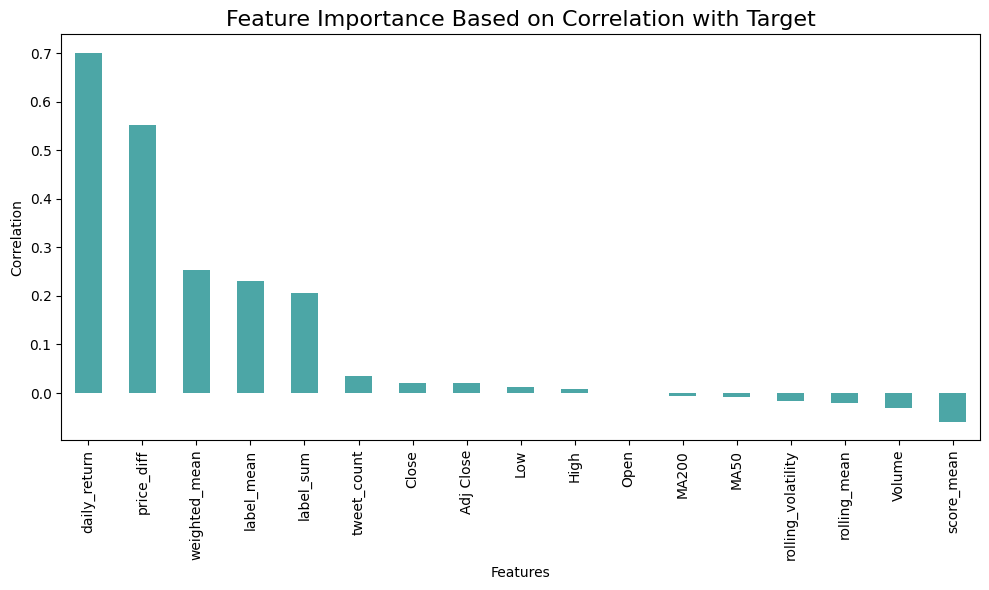

In [284]:
# Example: Let's assume your target variable is 'target' (price up or down)
# Calculate feature importance using correlation with target
# Select only numeric columns
numeric_df = perfect_df2.select_dtypes(include='number')



target_column = 'target'  # Change this if you have a specific target variable
# Compute correlation with the numeric target
correlation_target = numeric_df.corr()['target_encoded'].drop('target_encoded')
# Plot feature importance
plt.figure(figsize=(10, 6))
correlation_target.sort_values(ascending=False).plot(kind='bar', color='teal', alpha=0.7)
plt.title('Feature Importance Based on Correlation with Target', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()


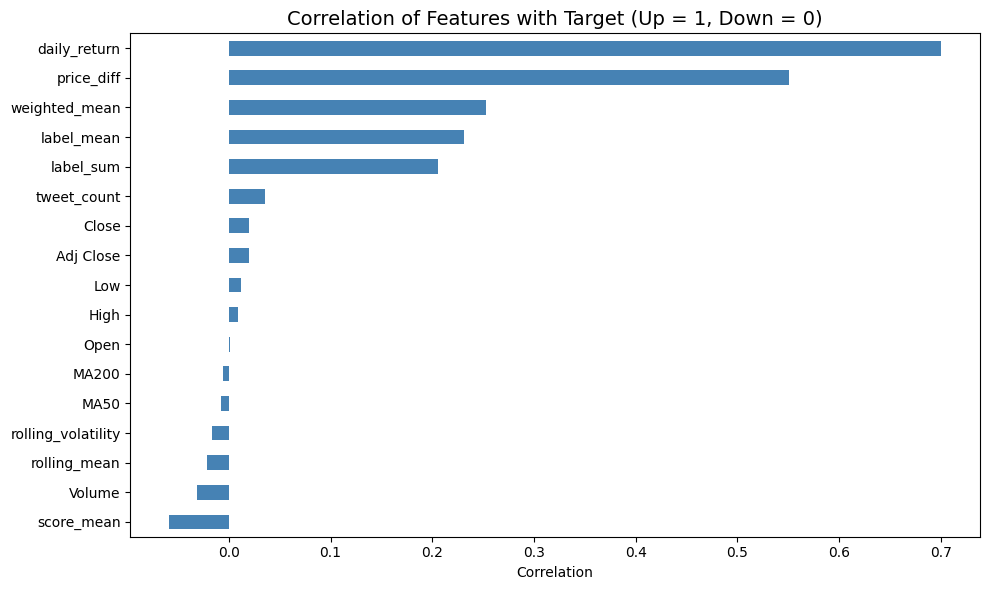

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
correlation_target.sort_values().plot(kind='barh', color='steelblue')
plt.title('Correlation of Features with Target (Up = 1, Down = 0)', fontsize=14)
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()


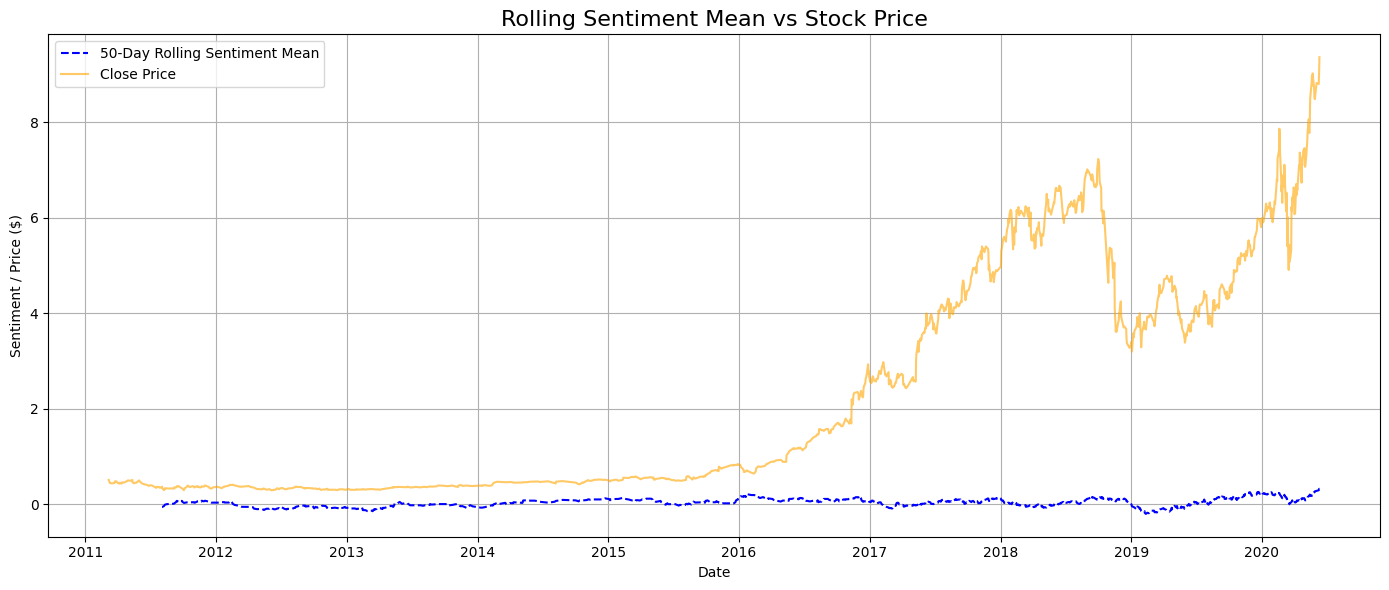

In [287]:
# Calculate rolling sentiment mean (50-day window)
perfect_df2['rolling_sentiment'] = perfect_df2['label_mean'].rolling(window=50).mean()

# Plot sentiment and price
plt.figure(figsize=(14, 6))
plt.plot(perfect_df2['Date'], perfect_df2['rolling_sentiment'], label='50-Day Rolling Sentiment Mean', color='blue', linestyle='--')
plt.plot(perfect_df2['Date'], perfect_df2['Close'], label='Close Price', color='orange', alpha=0.6)

plt.title('Rolling Sentiment Mean vs Stock Price', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sentiment / Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


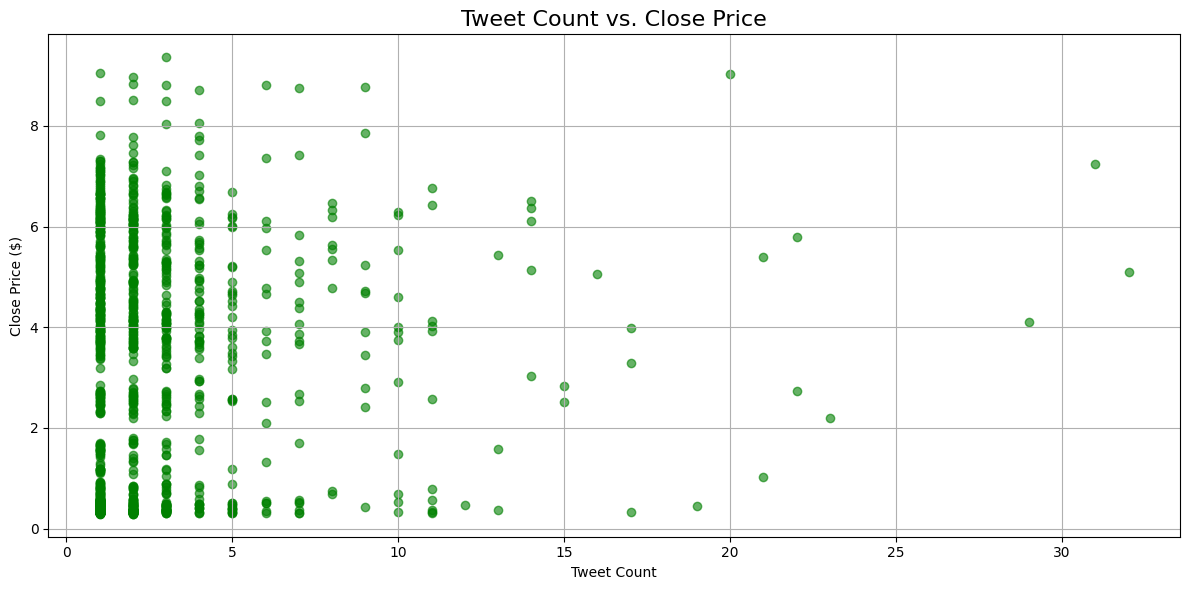

In [288]:
plt.figure(figsize=(12, 6))

# Scatter plot: Tweet Count vs. Close Price
plt.scatter(perfect_df2['tweet_count'], perfect_df2['Close'], alpha=0.6, color='green')
plt.title('Tweet Count vs. Close Price', fontsize=16)
plt.xlabel('Tweet Count')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [292]:
perfect_df2

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,label_mean,...,weighted_mean,score_mean,tweet_count,daily_return,rolling_mean,rolling_volatility,price_diff,target,target_encoded,rolling_sentiment
0,2011-03-07,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.541095,0.351701,0.000000,...,0.000000,0.909439,2.0,-0.019166,NaN,NaN,-0.01000,down,0,NaN
1,2011-03-08,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.543410,0.352554,0.250000,...,0.086861,0.736391,4.0,-0.044944,NaN,NaN,-0.02300,down,0,NaN
2,2011-03-09,0.48725,0.49200,0.47425,0.47850,0.438893,1318976000,0.545480,0.353401,0.000000,...,0.000000,0.922541,3.0,-0.020972,NaN,NaN,-0.01025,down,0,NaN
3,2011-03-10,0.46750,0.47100,0.44750,0.44800,0.410918,1722736000,0.546970,0.354055,0.000000,...,0.000000,0.888172,2.0,-0.063741,NaN,NaN,-0.03050,down,0,NaN
4,2011-03-15,0.43275,0.44900,0.42525,0.44150,0.404956,1256280000,0.551260,0.355870,-0.333333,...,-0.278049,0.904734,3.0,-0.014509,NaN,NaN,-0.00650,down,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,2020-05-28,8.41225,8.76050,8.37925,8.48700,8.457932,734896000,7.188575,5.849734,1.000000,...,0.547186,0.547186,1.0,-0.004487,7.06556,1.110259,-0.03825,down,0,0.271127
1119,2020-06-02,8.79625,8.83725,8.65800,8.82525,8.795021,391320000,7.407945,5.925408,-0.500000,...,-0.300774,0.763496,2.0,0.039855,7.13391,1.111312,0.33825,up,1,0.281127
1120,2020-06-08,8.87725,8.88975,8.68575,8.80500,8.778849,387736000,7.630800,6.018033,-0.333333,...,-0.303579,0.910003,3.0,-0.002295,7.18959,1.124084,-0.02025,down,0,0.294460
1121,2020-06-09,8.80000,9.10975,8.75125,9.04600,9.019129,468488000,7.685355,6.041827,1.000000,...,0.957068,0.957068,1.0,0.027371,7.27231,1.104927,0.24100,up,1,0.324460


In [293]:
perfect_df2.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
MA50,0
MA200,0
label_mean,0


In [294]:
# Replace 'Date' with your actual date column name
perfect_df2['Date'] = pd.to_datetime(perfect_df2['Date'])


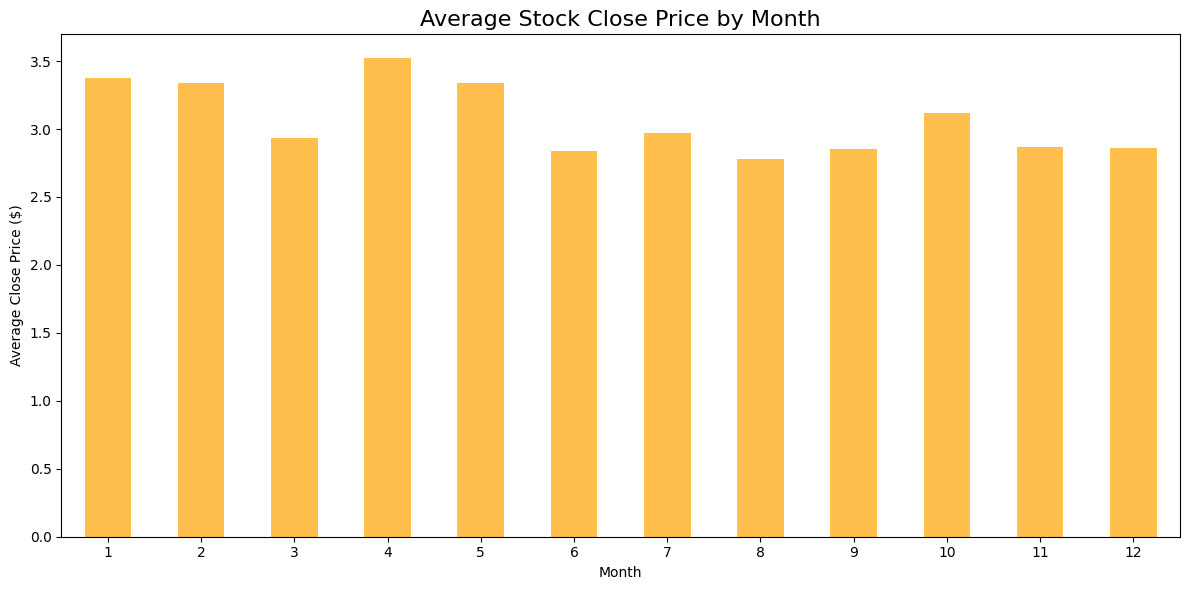

In [295]:
perfect_df2['month'] = perfect_df2['Date'].dt.month
monthly_avg_price = perfect_df2.groupby('month')['Close'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_price.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Stock Close Price by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Close Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-296-6fb709c14c2f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




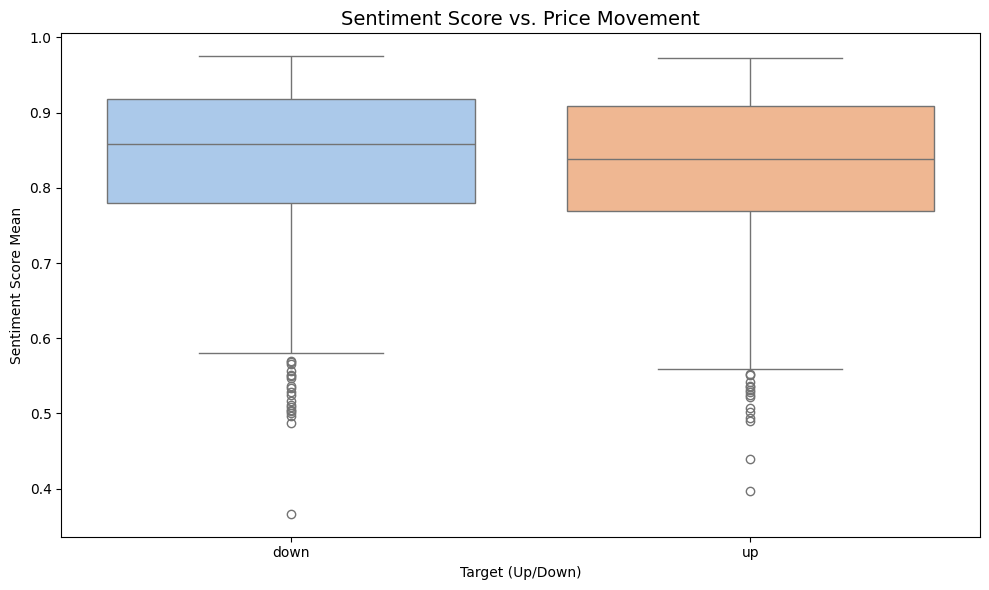

In [296]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='score_mean', data=perfect_df2, palette='pastel')
plt.title('Sentiment Score vs. Price Movement', fontsize=14)
plt.xlabel('Target (Up/Down)')
plt.ylabel('Sentiment Score Mean')
plt.tight_layout()
plt.show()
